<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Notebook 18: Interpolation

In [1]:

import numpy as np
import matplotlib.pyplot as plt

In this Notebook, we implement two interpolation methods: linear interpolation and multi-quadric interpolation. We write our own class and our own interpolation functions using object oriented programming. After we implement our own function, we compare our results with similar interpolation functions available in `scipy.interpolate`.

### Exercise 1. Linear interpolation
Write a class called `Interpolate` that interpolates linearly between data points. The constructor takes two input arguments: an array of measured $x$ values, which are monotonically increasing, and an array of corresponding measured $y$ values. The class has one function, called `interpolate`, that takes as input argument an array of $x$ values and returns an array of corresponding $y$ values that are linearly interpolated between the measured values (you have to write your own interpolation function and can not use an existing one; we learn how to use an existing one in the next exercise). Return `np.nan` if the $x$ value is smaller than the smallest measured $x$ value or larger than the largest measured $x$ value. Note that when $x$ is located between the measured values $x_{i}$ and $x_{i+1}$, with corresponding measured $y$ values $y_{i}$ and $y_{i+1}$, then the interpolated $y$ value is

$$y=y_{i} + \frac{x-x_{i}}{x_{i+1}-x_{i}}(y_{i+1}-y_{i})$$

Test your class by running the following code:

```
xmeas = np.array([0, 5, 7, 12, 16, 20, 24, 30, 32, 36])
ymeas = np.array([2, 4, 8,  4,  4,  8, 10,  8,  6,  6])
interp = Interpolate(xmeas, ymeas)
x = [-1, 3, 6, 17, 31, 45]
y = interp.interpolate(x)
```

Finally, plot the measured data, connected by straigh lines, and plot your interpolated values with red markers (they should fall on the lines, if you interpolation works correctly). 

In [38]:
class Interpolate: 
    def __init__(self,xi,yi): 
        self.xi = xi 
        self.yi = yi 
    def interpolate(self, x): 
        int_y = []
        for j in range(len(x)): 
            if x[j] < self.xi[0] or x[j] >self.xi[-1]: 
                y_cor = np.nan
            else: 
                for i in range(len(self.xi)): 
                    if x[j] > self.xi[i]:
                        y_cor = self.yi[i] + (x[j] - self.xi[i])/ (self.xi[i+1] - self.xi[i])*(self.yi[i+1] - self.yi[i])
                        
                
            int_y.append(y_cor)
        return int_y

In [39]:
#testing code 
xmeas = np.array([0, 5, 7, 12, 16, 20, 24, 30, 32, 36])
ymeas = np.array([2, 4, 8,  4,  4,  8, 10,  8,  6,  6])
interp = Interpolate(xmeas, ymeas)
x = [-1, 3, 6, 17, 31, 45]
y = interp.interpolate(x)



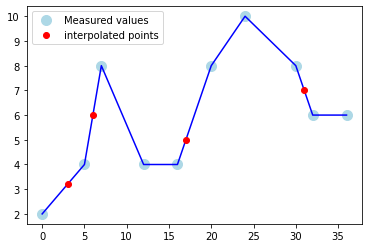

In [42]:
plt.plot(xmeas, ymeas, 'o', color = 'lightblue', markersize = 10, label = 'Measured values')
plt.plot(xmeas, ymeas, color = 'blue')
plt.plot(x,y, 'ro', label = 'interpolated points')
plt.legend();

### Exercise 2. Linear interpolation with `scipy.interpolate`
Use the `interp1d` function of `scipy.interpolate` to interpolate the data of the example above and make the same graph. Note that the object returned by `interp1d` can be called as a function and returns the interpolated values (see [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html)). Use `fill_value='extrapolate'` to extrapolate beyond the measurement range.

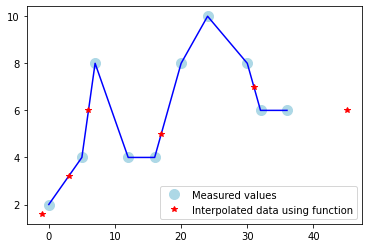

In [66]:
import scipy.interpolate as inter
function = inter.interp1d(xmeas,ymeas, fill_value='extrapolate')
y_inter = function(x)
plt.plot(xmeas, ymeas, 'o', color = 'lightblue', markersize = 10, label = 'Measured values')
plt.plot(xmeas, ymeas, color = 'blue')
plt.plot(x,y_inter, 'r*', label = 'Interpolated data using function')
plt.legend();

### Exercise 3. Radial basis function interpolation with multi-quadrics
Radial basis function methods are very flexible interpolation methods. They allow for the specification of the smoothness of the interpolation and can easily be extended to two-dimensional data (and even three-dimensional and higher). But we will stick with one-dimensional data here. There are several types of radial basis functions that an be used for interpolation. We will use the function called *multi-quadric*. The interpolation function for $N$ data points is

$$f(x) = \alpha_0 + \sum_{n=1}^N \alpha_n\sqrt{(x - x_n)^2 + \Delta^2 }$$

where $\alpha_n$ $(n=0,...,N)$ are $N+1$ coefficients that need to be computed and $\Delta$ is a smoothness parameter. When $\Delta=0$, interpolation is with straight lines. The coefficients $\alpha$ are computed such that the interpolation goes exactly through the data points. So there are $N$ equations

$$f(x_n) = y_n \qquad n=1,...,N$$

where $y_n$ is the measured value of $y$ at $x_n$. The final equation is that the alpha values from $1$ through $N$ sum up to zero

$$\sum_{n=1}^N \alpha_n = 0$$

Note that $f(x)$ can also be evaluated outside the range of measured values. 

Write a class called `MultiQuadric` that interpolates between data points using multi-quadrics. The constructor takes three input arguments: an array of measured $x$ values, an array of corresponding measured $y$ values, and the parameter $\Delta$. In addition, the class has two attributes: the number of data points $N$ and an array with the $\alpha$ values.  

There are three methods:
1. A method called `func` that takes as input arguments a value of $x$ and an integer $n$ and returns $\sqrt{(x - x_n)^2 + \Delta^2}$
2. A method called `solve` that takes no arguments (besides `self`), builds a system of $N+1$ by $N+1$ equations, and solves for the coefficients $\alpha$. This method is called from the constructor. For example, for three data points, the system of equations is

$$
\left(
\begin{array}{cccc}
1 & \sqrt{(x_1 - x_1)^2 + \Delta^2} & \sqrt{(x_1 - x_2)^2 + \Delta^2} & \sqrt{(x_1 - x_3)^2 + \Delta^2} \\
1 & \sqrt{(x_2 - x_1)^2 + \Delta^2} & \sqrt{(x_2 - x_2)^2 + \Delta^2} & \sqrt{(x_2 - x_3)^2 + \Delta^2} \\
1 & \sqrt{(x_3 - x_1)^2 + \Delta^2} & \sqrt{(x_3 - x_2)^2 + \Delta^2} & \sqrt{(x_3 - x_3)^2 + \Delta^2} \\
0 & 1 & 1 & 1\\
\end{array}
\right)
\left(
\begin{array}{c}
\alpha_0 \\\alpha_1 \\\alpha_2 \\ \alpha_3
\end{array}
\right)
=
\left(
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
0 \\
\end{array}
\right)
$$

Note that the `func` method should be called when building the matrix.

3. A method called `interpolate`, which takes as input argument an array $x$ and returns the interpolated values of $y$. This function also calls the `func` method, of course. Note that $x$ may include values outside the data range. 



Test your code with

```
xmeas = np.array([0, 5, 7, 12, 16, 20, 24, 30, 32, 36])
ymeas = np.array([2, 4, 8,  4,  4,  8, 10,  8,  6,  6])
x = np.linspace(-2, 42, 100)
mq1 = MultiQuadric(xmeas, ymeas, 0)
ymq1 = mq1.interpolate(x)
mq2 = MultiQuadric(xmeas, ymeas, 5)
ymq2 = mq2.interpolate(x)
```

Make one graph where you plot the measured data points with markers, and the two multi-quadric interpolations with lines. Add a legend.

In [113]:
class MultiQuadric: 
    def __init__(self,xmeas, ymeas, par):
        self.xmeas = xmeas 
        self.ymeas = ymeas 
        self.par = par
        self.N = len(xmeas)
        self.alpha = self.solve() #indicate that alpha is the result of an internal function
    def func(self,x,n): 
        self.x = x 
        self.n = n
        return np.sqrt((self.x-self.xmeas[self.n])**2 + self.par**2)
    def solve(self): 
        matrix = np.ones((self.N+1, self.N+1))
        matrix[self.N, 0] = 0
        y_mat = np.zeros(self.N +1)
        for i in range(1, self.N+1):  #going across coloms --> 
            for j in range(self.N): #going down 
                matrix[j,i] = self.func(self.xmeas[j], i -1)
                y_mat[j] = self.ymeas[j]
        solution = np.linalg.solve(matrix, y_mat)
        return solution 

    
    def interpolate(self, x): 
        self.x = x
        alist = []
        for o in range(len(self.x)): 
            a_val = self.alpha[0] #intial intercept
            for l in range(self.N): 
                a_val += self.alpha[l+1]*self.func(x[o],l)
            alist.append(a_val)
        return alist    

In [114]:
xmeas = np.array([0, 5, 7, 12, 16, 20, 24, 30, 32, 36])
ymeas = np.array([2, 4, 8,  4,  4,  8, 10,  8,  6,  6])
x = np.linspace(-2, 42, 100)
mq1 = MultiQuadric(xmeas, ymeas, 0)
ymq1 = mq1.interpolate(x)
mq2 = MultiQuadric(xmeas, ymeas, 5)
ymq2 = mq2.interpolate(x)



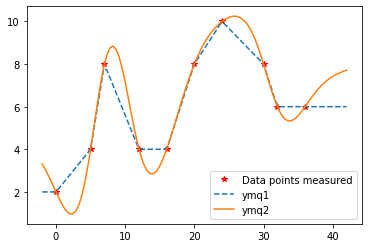

In [124]:
plt.plot(xmeas, ymeas,'r*', label = 'Data points measured')

plt.plot(x,ymq1,'--', label = 'ymq1')
plt.plot(x,ymq2, label = 'ymq2')
plt.legend();

### Exercise 4. Multi-quadric interpolation with `scipy`.
Use the `Rbf` class of `scipy.interpolate` to interpolate between and beyond the measurements from the above example. Create the same graph as for Exercise 3 for the case that $\Delta=5$ (note that $\Delta$ is called `epsilon` in the `Rbf` class). The results won't be exactly the same, but they should be very close (the multi-quadric formulation is slightly different in `Rbf` than in Exercise 3). 

In [68]:
xmeas = np.array([0, 5, 7, 12, 16, 20, 24, 30, 32, 36])
ymeas = np.array([2, 4, 8,  4,  4,  8, 10,  8,  6,  6])
x = np.linspace(-2, 42, 100)


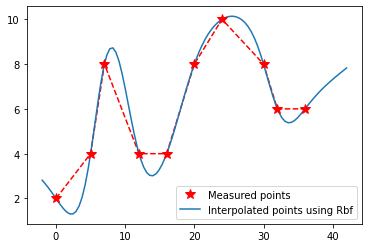

In [82]:
interpolation = inter.Rbf(xmeas, ymeas)
y = interpolation(x)
plt.plot(xmeas, ymeas, 'r*', markersize = 10, zorder = 1,label = 'Measured points')

plt.plot(xmeas, ymeas,'r--',zorder = 0)
plt.plot(x,y, zorder = 0, label = 'Interpolated points using Rbf')
plt.legend();

### Exercise 5: Two-dimensional interpolation
Interpolate the two-dimensional data where the `zm` values are measured at locations `xm, ym`. 

```
xm = np.array([2, 4, 10, 18])
ym = np.array([2, 18, 4, 12])
zm = np.array([12, 16, 28, 28])
```

Evaluate the `Rbf` function on a two-dimensional grid where $x$ and $y$ vary from 0 to 20 with 100 points (use `np.meshgrid`). Then use the `plt.contour` function to contour the data. Make a plot showing contours from 0 to 40 with steps of 2, and plot markers for the locations of the measurements. Print the measured value above each marker. Label the contours and make sure the scale is equal along both axes.

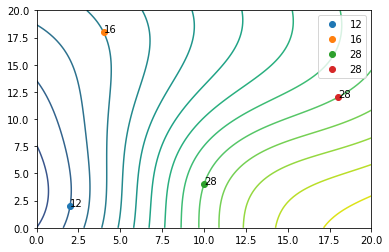

In [156]:
    xm = np.array([2, 4, 10, 18])
    ym = np.array([2, 18, 4, 12])
    zm = np.array([12, 16, 28, 28])
    interpolation = inter.Rbf(xm,ym, zm)

    #Creating the contour lines 
    #plt.contour(x_grid, y_grid, z_interp, levels, colors)
    x, y = np.linspace(0,20,100),np.linspace(0,20,100)
    xmesh, ymesh = np.meshgrid(x,y)
    plt.contour(xmesh,ymesh,interpolation(xmesh,ymesh), np.arange(0,40,2) )

    #plotting markers and corresponding numbers 
    for i in range(len(xm)): 
        plt.plot(xm[i], ym[i],'o', label = f'{zm[i]}')
        plt.text(xm[i], ym[i], zm[i])
    plt.legend();
